## Import packages

In [2]:
from utils import DQN, ReplayBuffer, greedy_action, epsilon_greedy, update_target, loss, plot_policy, run_policy_greedily
from .utils.DQN_Network import run_dqn
from .utils.DDQN_Network import run_ddqn

import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

import gym
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

import math
import time

## Experiments

### Suboptimal model parameters

In [53]:
#Suboptimal parameters for DQN found by random search

NUM_RUNS = 10
num_episodes=300
policy_neurons=[4,15, 15,2]
target_neurons=[4,15, 15,2]
learning_rate=0.001
EPSILON=0.9
buffer_max=50000
buffer_sample_no=32
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.1
optimal_params = {"policy_neurons": policy_neurons, "target_neurons": target_neurons, "learning_rate": learning_rate, "EPSILON": EPSILON, 
                  "buffer_max": buffer_max, "buffer_sample_no": buffer_sample_no, "update_target_rate": update_target_rate, 
                   "epsilon_decay": epsilon_decay, "use_decay": use_decay, "stop_epsilon": stop_epsilon}

#Get the results for DQN
policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                display=False)               

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Complete


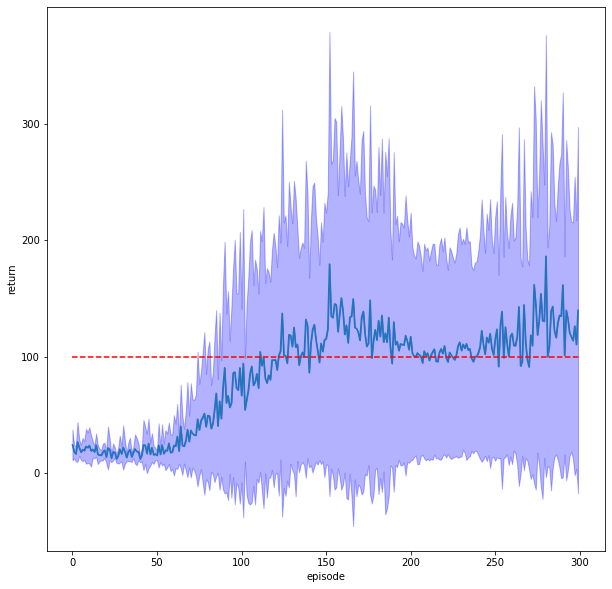

In [54]:
#Plot learning curve 
results = torch.tensor(runs_results)
means = results.float().mean(0)
stds = results.float().std(0)
num_episodes = len(means)

plt.figure(figsize=(10,10))
plt.plot(torch.arange(num_episodes), means)
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.fill_between(np.arange(num_episodes), means, means+stds, alpha=0.3, color='b')
plt.fill_between(np.arange(num_episodes), means, means-stds, alpha=0.3, color='b')
plt.show()

### Optimal model parameters

In [ ]:
#Optimal parameters for DQN found through hyperparameter tuning (detailed in later sections)

NUM_RUNS = 10
num_episodes=300
policy_neurons=[4,25,2]
target_neurons=[4,25,2]
learning_rate=0.001
EPSILON=1
buffer_max=50000
buffer_sample_no=128
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.05
optimal_params = {"policy_neurons": policy_neurons, "target_neurons": target_neurons, "learning_rate": learning_rate, "EPSILON": EPSILON, 
                  "buffer_max": buffer_max, "buffer_sample_no": buffer_sample_no, "update_target_rate": update_target_rate, 
                   "epsilon_decay": epsilon_decay, "use_decay": use_decay, "stop_epsilon": stop_epsilon}

#Get the results for DQN    
policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon)               

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

#### Learning curve

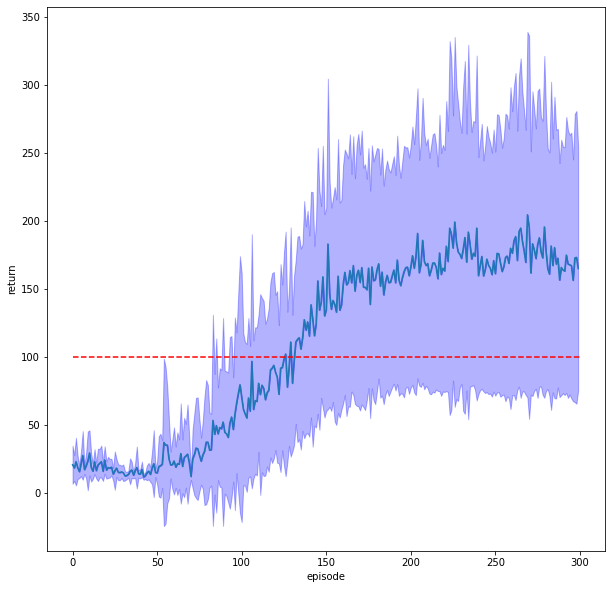

In [ ]:
#Plot learning curve
results = torch.tensor(runs_results)
means = results.float().mean(0)
stds = results.float().std(0)
num_episodes = len(means)

plt.figure(figsize=(10,10))
plt.plot(torch.arange(num_episodes), means)
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.fill_between(np.arange(num_episodes), means, means+stds, alpha=0.3, color='b')
plt.fill_between(np.arange(num_episodes), means, means-stds, alpha=0.3, color='b')
plt.show()

#### Performance

In [ ]:
#Seeing how many of the values from means are greater than 100
print("Number of episodes with return greater than 100: ", torch.sum(means > 100))

#Printing average returns
print("Average return: ", torch.mean(means))

Number of episodes with return greater than 100:  tensor(191)
Average return:  tensor(141.0310)


In [ ]:
#Print if there are more than 50 consecutive episodes with rewards >100:
means_arr = (means.numpy().flatten())
passes = False
for i in range(len(means_arr)):
  if all(means_arr[i:(i+51)] > 100):
    print("Pass performance")
    passes = True
    break

print(f"Pass performance or not: {passes}")

Pass performance
Pass performance or not: True


#### Visualising the policy and q values

In [ ]:
#One more run
NUM_RUNS = 1

#Optimal parameters
num_episodes=300
policy_neurons=[4,25,2]
target_neurons=[4,25,2]
learning_rate=0.001
EPSILON=1
buffer_max=50000
buffer_sample_no=128
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.05
optimal_params = {"policy_neurons": policy_neurons, "target_neurons": target_neurons, "learning_rate": learning_rate, "EPSILON": EPSILON, 
                  "buffer_max": buffer_max, "buffer_sample_no": buffer_sample_no, "update_target_rate": update_target_rate, 
                   "epsilon_decay": epsilon_decay, "use_decay": use_decay, "stop_epsilon": stop_epsilon}

#Get the results for DQN
policy_net, target_net, runs_results, epsilons, angl_vs, angles = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, NUM_RUNS=NUM_RUNS, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                show_ranges=True, display=True, return_ranges=True)               

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 1
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Complete
Minimum and maximum pole angular velocity:
-2.847969 2.7728536
Minimum and maximum pole angle:
-0.25047612 0.24474676


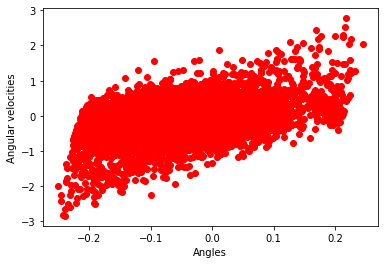

In [ ]:
#Scatter plot of ranges of angles and angular velocities observed during the run
plt.scatter(angles, angl_vs, color='red')
plt.xlabel('Angles')
plt.ylabel('Angular velocities')
plt.show()

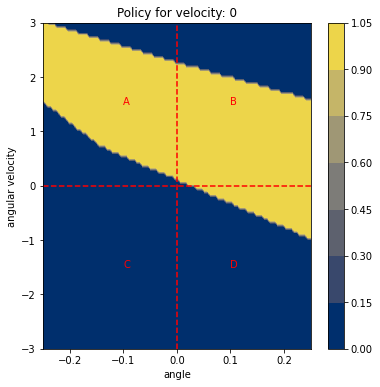

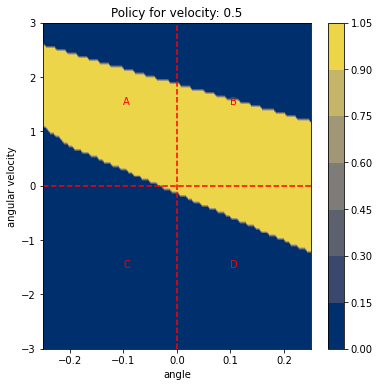

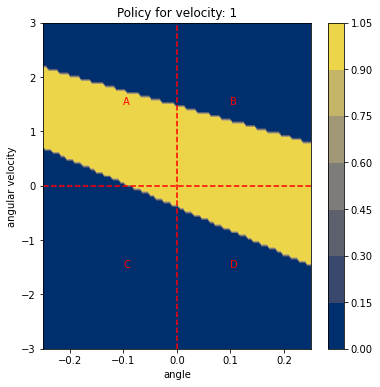

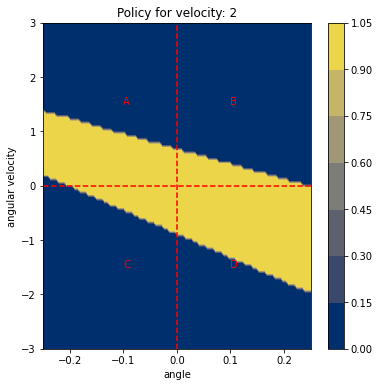

In [ ]:
#Plotting polcies for different velocities
velocities = [0, 0.5, 1, 2]
n = len(runs_results[0])
for v in velocities:
    plot_policy(policy_net, q=False, angle_range=0.25, omega_range=3, num_episodes=n, v=v, plot_locator=True,
                plot_quads=True)

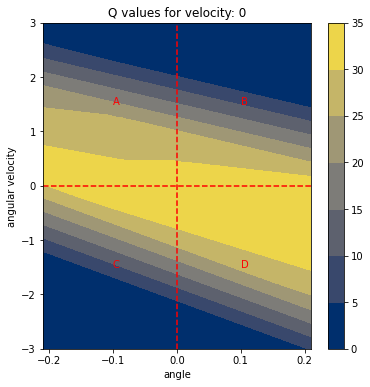

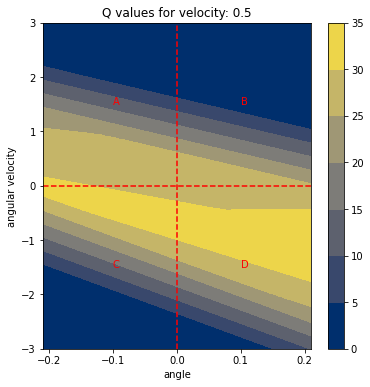

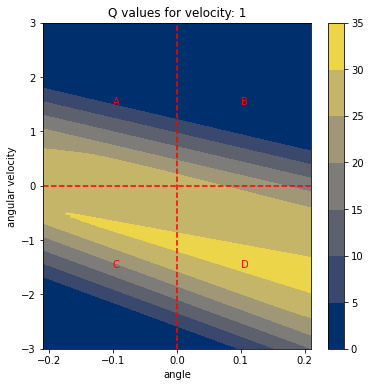

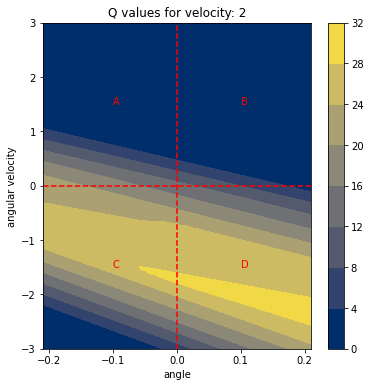

In [ ]:
#Plotting Q values for different velocities
velocities = [0, 0.5, 1, 2]
for v in velocities:
    plot_policy(policy_net, q=True, angle_range=0.2095, omega_range=3, num_episodes=n, v=v, plot_locator=True, 
                plot_quads=True)

### Hyperparameter tuning

#### Different learning rates

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

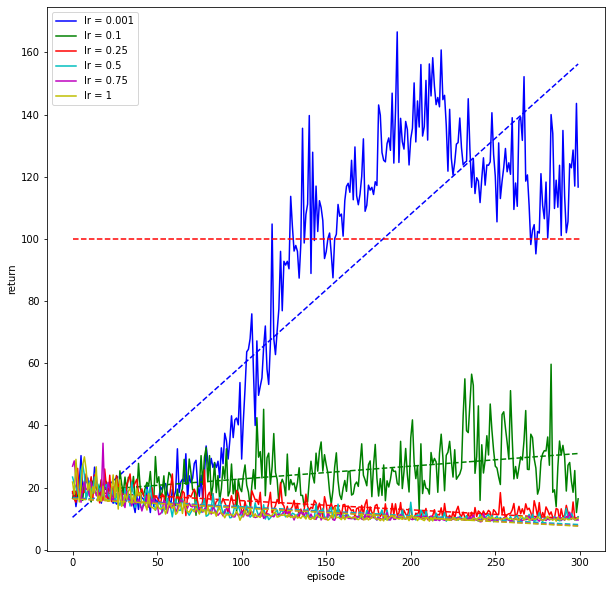

In [ ]:
#Getting results for different learning rates
learning_rates = [0.001, 0.1, 0.25, 0.5, 0.75, 1]
num_episodes = 300
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
EPSILON = optimal_params["EPSILON"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
update_target_rate = optimal_params["update_target_rate"]
epsilon_decay = optimal_params["epsilon_decay"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different learning rates
means_list = []
for lr in learning_rates:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=lr, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon) 
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different learning rates
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(learning_rates)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"lr = {learning_rates[i]}", color=colors[i])
    
    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])
    
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

##### Losses

In [ ]:
#Getting losses for different learning rates
num_episodes=300
learning_rates=[0.001, 0.01, 0.1, 0.3, 0.5]
policy_neurons=[4,25,2]
target_neurons=[4,25,2]
EPSILON=1
buffer_max=50000
buffer_sample_no=128
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.05
losses_lrs = []
times = []

#Run DQN for different learning rates
for learning_rate in learning_rates:
  time1 = time.time()
  policy_net, target_net, runs_results, epsilons, losses = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                  learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                  buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                  epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                  return_losses = True, NUM_RUNS=1)               
  time2 = time.time()
  times.append(time2-time1)
  losses_lrs.append(losses)

Complete
Complete
Complete
Complete
Complete


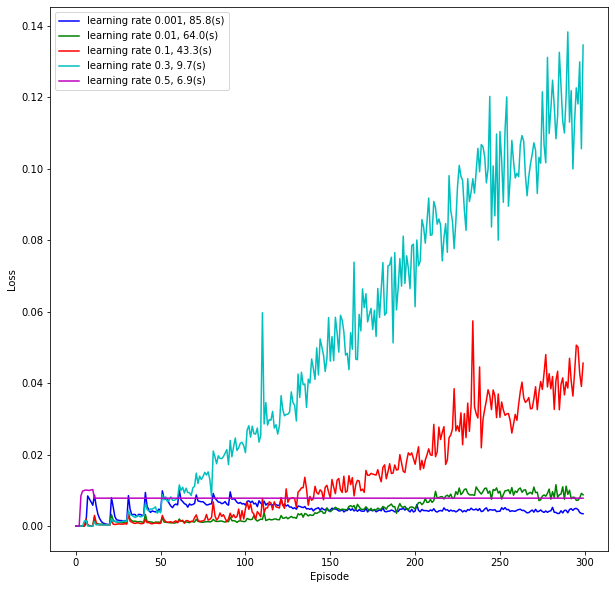

In [ ]:
#Plot losses for different learning rates
plt.figure(figsize=(10,10))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i in range(len(losses_lrs)):
    plt.plot(losses_lrs[i], label="learning rate {}, {}(s)".format(learning_rates[i], round(times[i], 1)), color=colors[i])
plt.xlabel("Episode")
plt.ylabel("Loss")    
plt.legend()
plt.show()

### Different epsilons

In [ ]:
#Getting the results for different epsilon values
num_episodes = 300
EPSILONS = [1, 0.9, 0.7, 0.5, 0.25]
buffer_sample_no = optimal_params["buffer_sample_no"]
update_target_rate = optimal_params["update_target_rate"]
epsilon_decay = optimal_params["epsilon_decay"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different epsilon values
means_list = []
for EPSILON in EPSILONS:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon, NUM_RUNS=5)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)

Starting run 1 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Complete
Starting run 1 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 5
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 5
episode  50 / 300
episode  100 / 300
epi

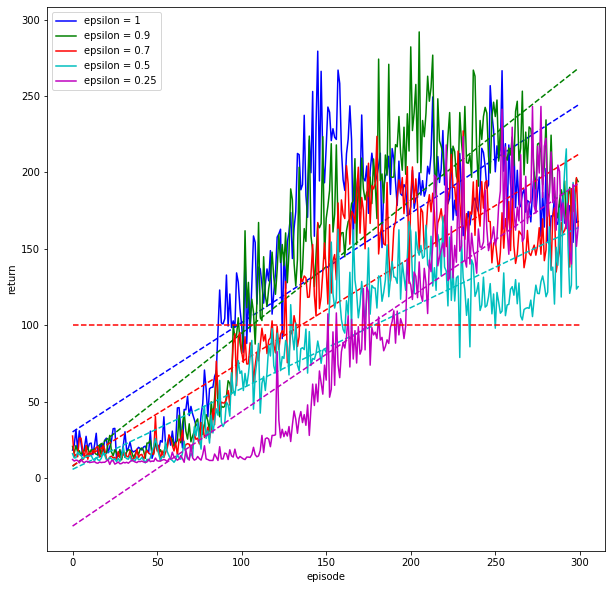

In [ ]:
#Plotting the learning curves for different epsilon values
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(EPSILONS)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"epsilon = {EPSILONS[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()


## Different epsilon decays

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

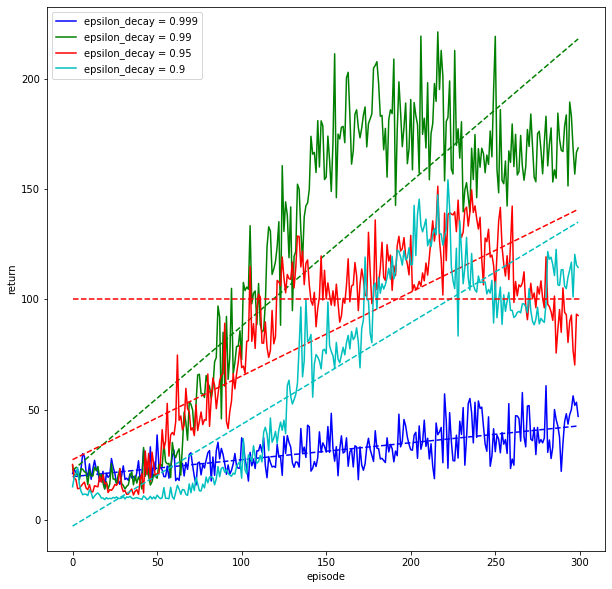

In [ ]:
#Get results for different epsilon decay values
epsilon_decays = [0.999, 0.99, 0.95, 0.9]
num_episodes = 300
EPSILON = optimal_params["EPSILON"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
update_target_rate = optimal_params["update_target_rate"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different epsilon decay values
means_list = []
for epsilon_decay in epsilon_decays:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different epsilon decay values
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(epsilon_decays)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"epsilon_decay = {epsilon_decays[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

## Different stop_epsilons

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

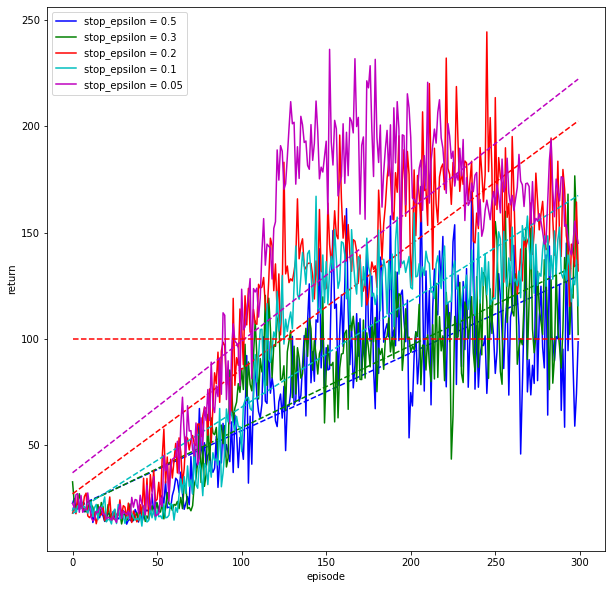

In [ ]:
#Get results for different stopping epsilon values
num_episodes = 300
stop_epsilons = [0.5, 0.3, 0.2, 0.1, 0.05] 
EPSILON = optimal_params["EPSILON"]
epsilon_decay = optimal_params["epsilon_decay"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
update_target_rate = optimal_params["update_target_rate"]
use_decay = optimal_params["use_decay"]

#Run DQN for different stopping epsilon values
means_list = []
for stop_epsilon in stop_epsilons:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different stopping epsilon values
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(stop_epsilons)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"stop_epsilon = {stop_epsilons[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

### Different neuron sizes

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

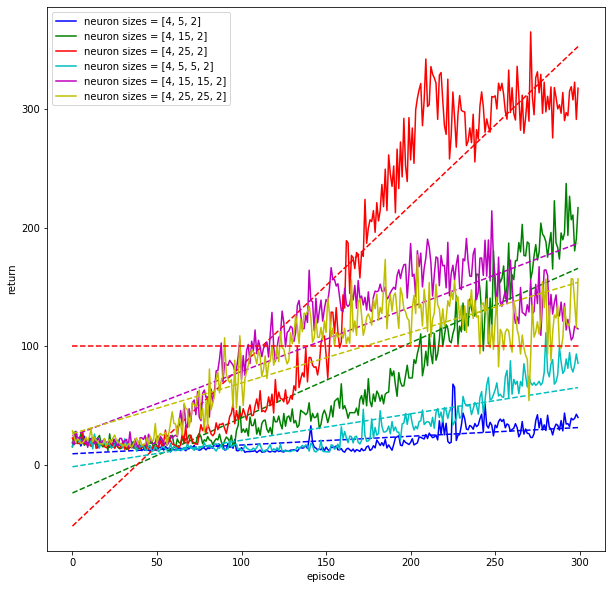

In [ ]:
#Get results for different network sizes
neuron_sizes = [[4,5,2], [4,15, 2], [4,25,2], [4,5,5,2], [4,15,15,2], [4,25,25,2]]
num_episodes = 300
EPSILON = optimal_params["EPSILON"]
epsilon_decay = optimal_params["epsilon_decay"]
learning_rate = optimal_params["learning_rate"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
update_target_rate = optimal_params["update_target_rate"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different network sizes
means_list = []
for neuron_size in neuron_sizes:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=neuron_size, target_neurons=neuron_size, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different network sizes
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(neuron_sizes)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"neuron sizes = {neuron_sizes[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

## Different target_updates

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

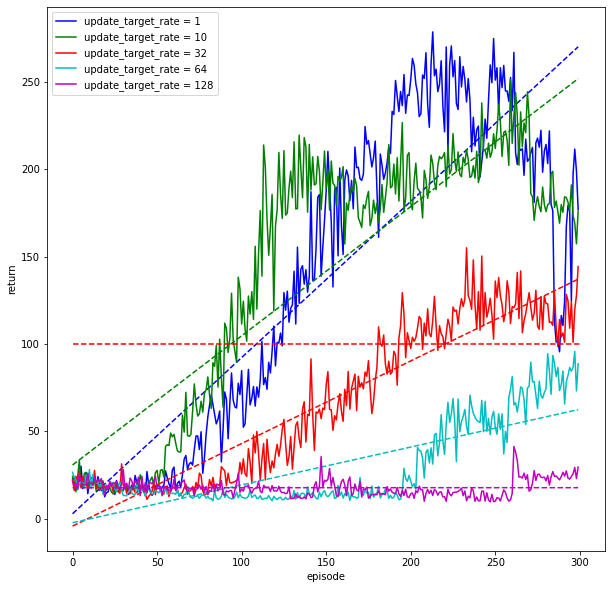

In [ ]:
#Get results for different target update rates
num_episodes = 300
update_target_rates = [1, 10, 32, 64, 128]
epsilon_decay = optimal_params["epsilon_decay"]
EPSILON = optimal_params["EPSILON"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different target update rates
means_list = []
for update_target_rate in update_target_rates:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different target update rates
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(update_target_rates)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"update_target_rate = {update_target_rates[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

## Different buffer sample size

In [ ]:
#Get results for different buffer sample sizes
num_episodes = 300
buffer_sample_nos = [8, 16, 32, 64, 128]
update_target_rate = optimal_params["update_target_rate"]
epsilon_decay = optimal_params["epsilon_decay"]
EPSILON = optimal_params["EPSILON"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different buffer sample sizes
means_list = []
for buffer_sample_no in buffer_sample_nos:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes, stop_epsilon=stop_epsilon, NUM_RUNS=10)  
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)

Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

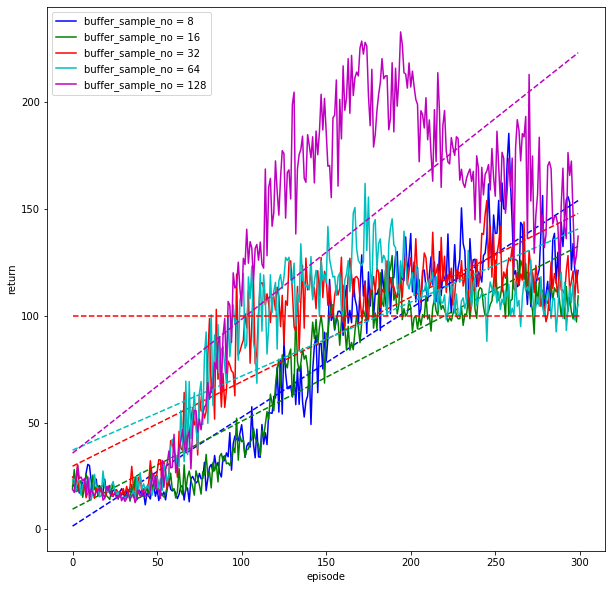

In [ ]:
#Plot learning curves for different buffer sample sizes
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,10))
for i in range(len(buffer_sample_nos)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"buffer_sample_no = {buffer_sample_nos[i]}", color=colors[i])

    #Add trend line
    z = np.polyfit(np.arange(num_episodes), means_list[i], 1)
    p = np.poly1d(z)
    plt.plot(np.arange(num_episodes),p(np.arange(num_episodes)),"--", color=colors[i])

plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

### Different buffer_max

/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

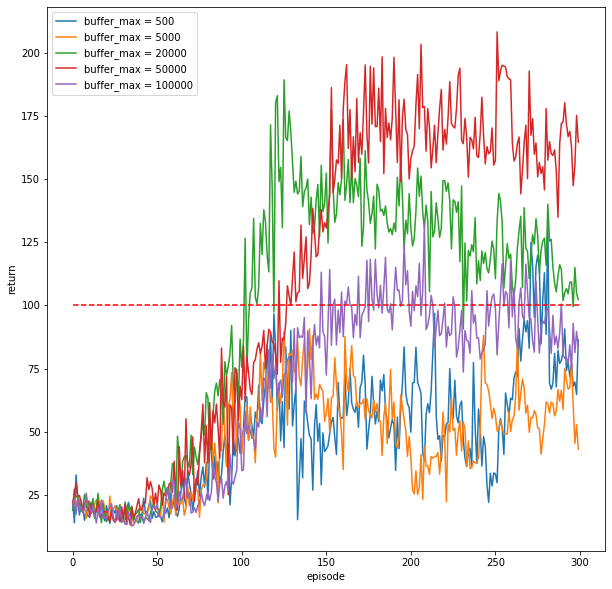

In [ ]:
#Get results for different buffer max sizes
buffer_maxes = [500, 5000, 20000, 50000, 100000]
num_episodes = 300
update_target_rate = optimal_params["update_target_rate"]
epsilon_decay = optimal_params["epsilon_decay"]
EPSILON = optimal_params["EPSILON"]
learning_rate = optimal_params["learning_rate"]
policy_neurons= optimal_params["policy_neurons"]
target_neurons = optimal_params["target_neurons"]
buffer_max = optimal_params["buffer_max"]
buffer_sample_no = optimal_params["buffer_sample_no"]
use_decay = optimal_params["use_decay"]
stop_epsilon = optimal_params["stop_epsilon"]

#Run DQN for different buffer max sizes
means_list = []
for buffer_max in buffer_maxes:
    policy_net, target_net, runs_results, epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                        learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, buffer_sample_no=buffer_sample_no, 
                                                        update_target_rate=update_target_rate, epsilon_decay=epsilon_decay, use_decay=use_decay,
                                                        num_episodes=num_episodes) 
    results = torch.tensor(runs_results)
    means = results.float().mean(0)    
    means_list.append(means)


#Plot learning curves for different buffer max sizes
plt.figure(figsize=(10,10))
for i in range(len(buffer_maxes)):
    plt.plot(torch.arange(num_episodes), means_list[i], label=f"buffer_max = {buffer_maxes[i]}")
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.legend()
plt.show()

# DDQN

Comparing the performance of DQN and DDQN.

## Running with optimal DQN parameters

In [41]:
#Optimal parameters for DQN
NUM_RUNS = 10
num_episodes=300
policy_neurons=[4,25,2]
target_neurons=[4,25,2]
learning_rate=0.001
EPSILON=1
buffer_max=50000
buffer_sample_no=128
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.05
optimal_params = {"policy_neurons": policy_neurons, "target_neurons": target_neurons, "learning_rate": learning_rate, "EPSILON": EPSILON, 
                  "buffer_max": buffer_max, "buffer_sample_no": buffer_sample_no, "update_target_rate": update_target_rate, 
                   "epsilon_decay": epsilon_decay, "use_decay": use_decay, "stop_epsilon": stop_epsilon}

#Run DDQN with optimal parameters for DQN
DDQN_policy_net, DDQN_target_net, DDQN_runs_results, DDQN_epsilons = run_ddqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                display=True)               

#Run DQN with optimal parameters
DQN_policy_net, DQN_target_net, DQN_runs_results, DQN_epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                display=True)               

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Starting run 1 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 2 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 3 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 4 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 5 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 6 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 7 of 10
episode  50 / 300
episode  100 / 300
episode  150 / 300
episode  200 / 300
episode  250 / 300
episode  300 / 300
Starting run 8 of 10
episode  50 / 300
episode  100 / 300
epis

## Learning curve with DQN optimal parameters

## Learning curve

In [42]:
#Results for DDQN 
DDQN_results = torch.tensor(DDQN_runs_results)
DDQN_means = DDQN_results.float().mean(0)
DDQN_stds = DDQN_results.float().std(0)
num_episodes = len(DDQN_means)

#Results for DQN
DQN_results = torch.tensor(DQN_runs_results)
DQN_means = DQN_results.float().mean(0)
DQN_stds = DQN_results.float().std(0)
num_episodes = len(DQN_means)

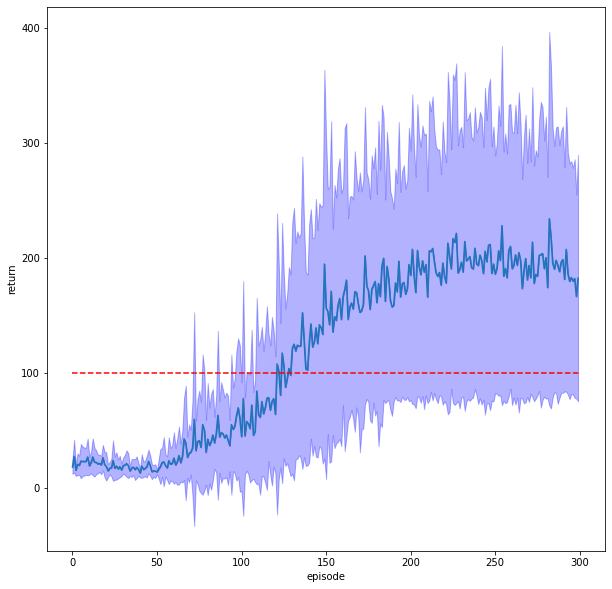

In [43]:
#Learning curve for only DDQN
plt.figure(figsize=(10,10))
plt.plot(torch.arange(num_episodes), DDQN_means)
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means+DDQN_stds, alpha=0.3, color='b')
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means-DDQN_stds, alpha=0.3, color='b')
plt.show()

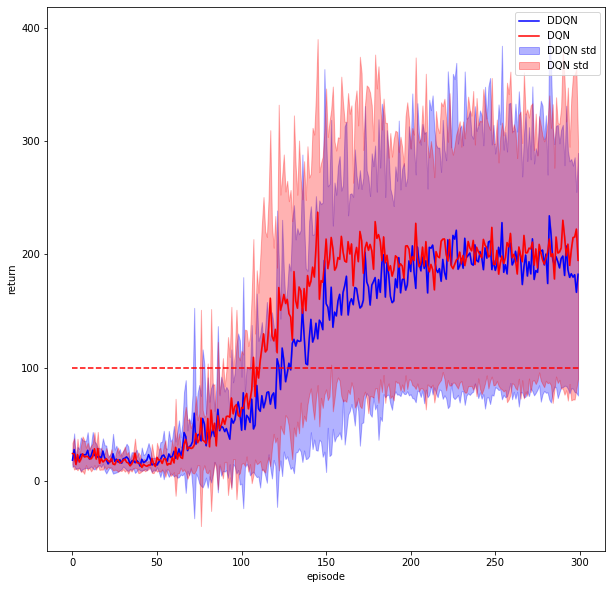

In [45]:
#Learning curve for DQN and DDQN
plt.figure(figsize=(10,10))

plt.plot(torch.arange(num_episodes), DDQN_means, color="b", label="DDQN")
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means+DDQN_stds, alpha=0.3, color='b', label="DDQN std")
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means-DDQN_stds, alpha=0.3, color='b')

plt.plot(torch.arange(num_episodes), DQN_means, color="r", label="DQN")
plt.fill_between(np.arange(num_episodes), DQN_means, DQN_means+DQN_stds, alpha=0.3, color='r', label="DQN std")
plt.fill_between(np.arange(num_episodes), DQN_means, DQN_means-DQN_stds, alpha=0.3, color='r')

plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.ylabel("return")
plt.xlabel("episode")
plt.legend()
plt.show()

### Performance

In [17]:
#Seeing how many of the values from means are greater than 100
print("Number of episodes with return greater than 100: ", torch.sum(means > 100))

#Printing average returns
print("Average return: ", torch.mean(means))

Number of episodes with return greater than 100:  tensor(179)
Average return:  tensor(105.6220)


In [18]:
#Print if there are more than 50 consecutive episodes with rewards >100:
means_arr = (means.numpy().flatten())
passes = False
for i in range(len(means_arr)):
  if all(means_arr[i:(i+51)] > 100):
    print("Pass performance")
    passes = True
    break

print(f"Pass performance or not: {passes}")

Pass performance
Pass performance or not: True


### Learning curves over 600 episodes

In [ ]:
#Optimal model parameters for DQN with 10 runs and 600 episodes
NUM_RUNS = 10
num_episodes=600
policy_neurons=[4,25,2]
target_neurons=[4,25,2]
learning_rate=0.001
EPSILON=1
buffer_max=50000
buffer_sample_no=128
update_target_rate=10
epsilon_decay=0.99
use_decay=True 
stop_epsilon = 0.05
optimal_params = {"policy_neurons": policy_neurons, "target_neurons": target_neurons, "learning_rate": learning_rate, "EPSILON": EPSILON, 
                  "buffer_max": buffer_max, "buffer_sample_no": buffer_sample_no, "update_target_rate": update_target_rate, 
                   "epsilon_decay": epsilon_decay, "use_decay": use_decay, "stop_epsilon": stop_epsilon}

#Get results for DDQN
DDQN_policy_net, DDQN_target_net, DDQN_runs_results, DDQN_epsilons = run_ddqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                display=False)               

#Get results for DQN
DQN_policy_net, DQN_target_net, DQN_runs_results, DQN_epsilons = run_dqn(policy_neurons=policy_neurons, target_neurons=target_neurons, 
                                                learning_rate=learning_rate, EPSILON=EPSILON, buffer_max=buffer_max, 
                                                buffer_sample_no=buffer_sample_no, update_target_rate=update_target_rate, 
                                                epsilon_decay=epsilon_decay, num_episodes=num_episodes, use_decay=use_decay, stop_epsilon=stop_epsilon,
                                                display=False)               

### Learning curves without s.d.

In [20]:
#Get results for DDQN
DDQN_results = torch.tensor(DDQN_runs_results)
DDQN_means = DDQN_results.float().mean(0)
DDQN_stds = DDQN_results.float().std(0)
num_episodes = len(DDQN_means)

#Get results for DQN
DQN_results = torch.tensor(DQN_runs_results)
DQN_means = DQN_results.float().mean(0)
DQN_stds = DQN_results.float().std(0)
num_episodes = len(DQN_means)

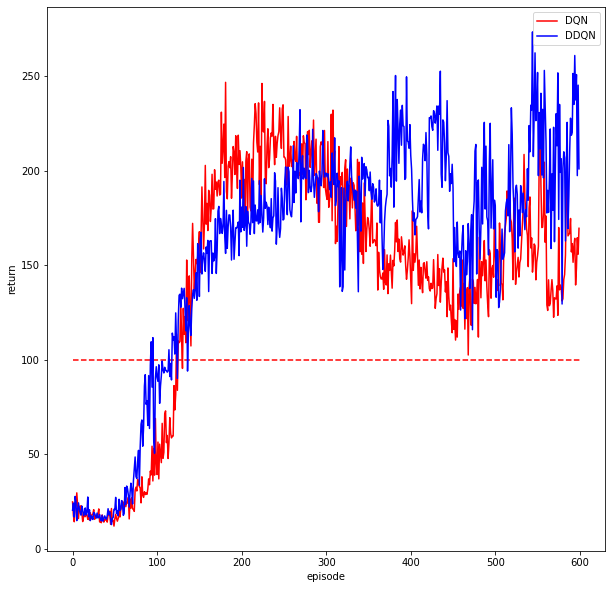

In [21]:
#Plotting learning curves for DQN and DDQN
plt.figure(figsize=(10,10))

plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.plot(torch.arange(num_episodes), DQN_means, color="r", label="DQN")
plt.plot(torch.arange(num_episodes), DDQN_means, color="b", label="DDQN")
plt.ylabel("return")
plt.xlabel("episode")

plt.legend()
plt.show()

### Learning curves with s.d.

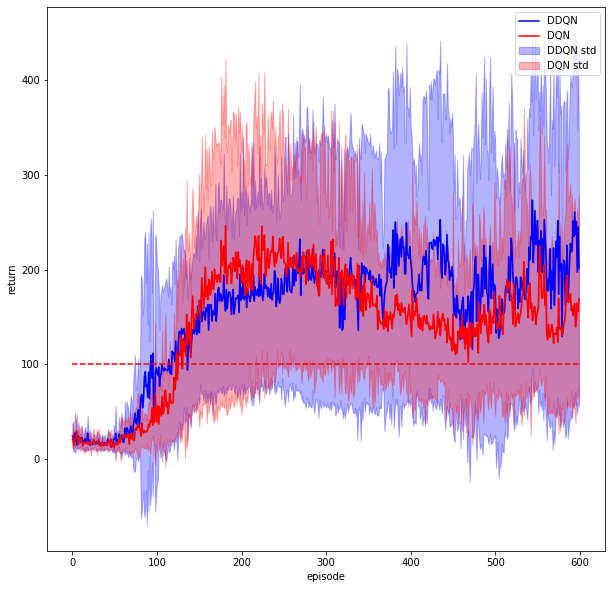

In [26]:
#Plotting learning curves for DQN and DDQN with std
plt.figure(figsize=(10,10))

#DDQN
plt.plot(torch.arange(num_episodes), DDQN_means, color="b", label="DDQN")
plt.ylabel("return")
plt.xlabel("episode")
plt.plot([0, num_episodes], [100, 100], 'r', linestyle='--')
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means+DDQN_stds, alpha=0.3, color='b', label="DDQN std")
plt.fill_between(np.arange(num_episodes), DDQN_means, DDQN_means-DDQN_stds, alpha=0.3, color='b')

#DQN
plt.plot(torch.arange(num_episodes), DQN_means, color="r", label="DQN")
plt.fill_between(np.arange(num_episodes), DQN_means, DQN_means+DQN_stds, alpha=0.3, color='r', label="DQN std")
plt.fill_between(np.arange(num_episodes), DQN_means, DQN_means-DQN_stds, alpha=0.3, color='r')

plt.legend()
plt.show()